In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
path=r"C:\Users\anike\clenaned_car_data.csv"

df=pd.read_csv(path)

In [4]:
df=df.drop(columns=["Unnamed: 0"])

In [5]:
df.isnull().sum()

company                0
year_of_purchase       0
km_driven              0
fuel_type              0
transmission_type      0
owner                  0
no_of_seats          221
selling_price          0
dtype: int64

In [6]:
df.describe()

,year_of_purchase,km_driven,no_of_seats,selling_price
count,8128.000,8128.000,7907.000,8128.000
mean,2013.804,69819.511,5.417,638271.808
std,4.044,56550.555,0.960,806253.404
min,1983.000,1.000,2.000,29999.000
25%,2011.000,35000.000,5.000,254999.000
50%,2015.000,60000.000,5.000,450000.000
75%,2017.000,98000.000,5.000,675000.000
max,2020.000,2360457.000,14.000,10000000.000


# null values

In [7]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

In [8]:
df[df["no_of_seats"].isnull()]

,company,year_of_purchase,km_driven,fuel_type,transmission_type,owner,no_of_seats,selling_price
13,Maruti,2007,80000,Petrol,Manual,Second Owner,NaN,200000
31,Fiat,2003,50000,Petrol,Manual,Second Owner,NaN,70000
78,Tata,2003,70000,Diesel,Manual,First Owner,NaN,50000
87,Maruti,2015,78000,Diesel,Manual,First Owner,NaN,475000
119,Maruti,2010,120000,Diesel,Manual,Second Owner,NaN,300000
138,BMW,2017,27000,Diesel,Automatic,First Owner,NaN,2150000
200,Toyota,2012,120000,Diesel,Manual,First Owner,NaN,235000
206,Maruti,2003,90000,Petrol,Manual,Second Owner,NaN,40000
228,Maruti,2008,120000,Petrol,Manual,Second Owner,NaN,130000
252,Tata,2005,110000,Diesel,Manual,Second Owner,NaN,75000


simply droppig this null values as we can easily count car seats it is not going to be null in production 

In [9]:
df=df.dropna()

# Outlier identifying and handling

# km driven

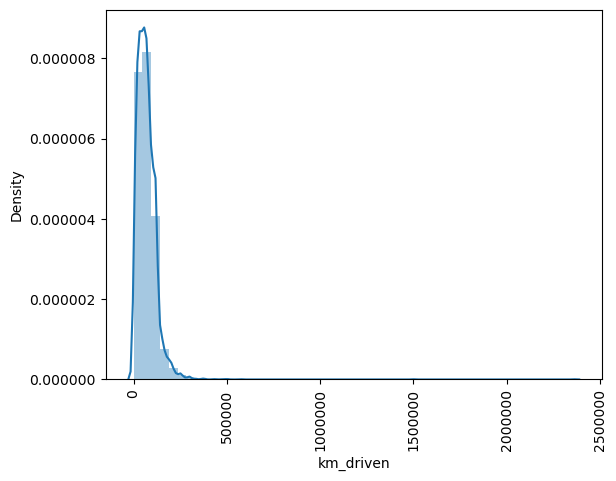

In [10]:
sns.distplot(df["km_driven"])
plt.xticks(rotation=90)
plt.ticklabel_format(style="plain",axis='x')
plt.ticklabel_format(style="plain",axis='y')

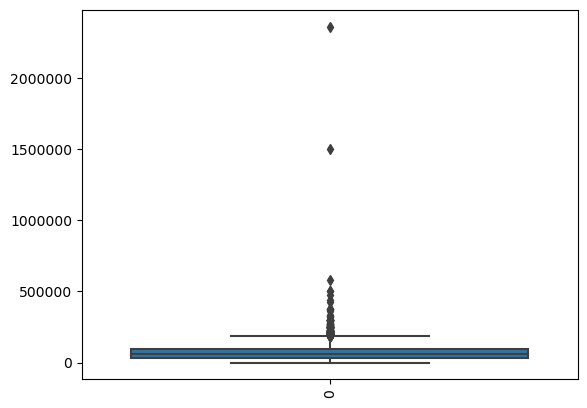

In [11]:
sns.boxplot(df["km_driven"])
plt.xticks(rotation=90)
plt.ticklabel_format(style="plain",axis='Y')

In [12]:
def outliers(col="km_driven"):
    
        q1 = df[col].quantile(0.25)
        q3= df[col].quantile(0.75)

        # interquantile range

        iqr=q3-q1

        lower_bound=iqr-1.5*q1

        upper_bound=iqr+1.5*q1

        outliers=df[(df[col]<lower_bound) | (df[col]>upper_bound)]
        
        outliers=outliers.sort_values(by=col)
        
        outliers=outliers.reset_index(drop=True)

        outliers.to_csv(f"outliers_{col}.csv")
        
        return outliers

In [13]:
outliers("km_driven").describe()

,year_of_purchase,km_driven,no_of_seats,selling_price
count,1552.000,1552.000,1552.000,1552.000
mean,2012.937,119818.483,5.724,625073.528
std,4.330,99511.963,1.201,847900.290
min,1997.000,1.000,2.000,40000.000
25%,2010.000,120000.000,5.000,245000.000
50%,2013.000,120000.000,5.000,430000.000
75%,2016.000,150000.000,7.000,650000.000
max,2020.000,2360457.000,10.000,7200000.000


In [14]:
# km driven having more outliers

In [15]:
outliers("km_driven").sort_values(by="km_driven")

,company,year_of_purchase,km_driven,fuel_type,transmission_type,owner,no_of_seats,selling_price
0,Maruti,2011,1,CNG,Manual,Fourth & Above Owner,5.000,209000
1,Toyota,2020,1000,Diesel,Automatic,First Owner,7.000,2300000
2,Maruti,2020,1000,Petrol,Manual,First Owner,5.000,445000
3,Maruti,2020,1000,Petrol,Manual,First Owner,5.000,445000
4,Honda,2018,1000,Petrol,Automatic,First Owner,5.000,1085000
5,Hyundai,2020,1000,Petrol,Manual,First Owner,5.000,500000
6,Maruti,2020,1000,Petrol,Automatic,First Owner,5.000,654000
7,Datsun,2019,1300,Petrol,Manual,First Owner,5.000,325000
12,Honda,2019,1303,Petrol,Manual,First Owner,5.000,690000
11,Honda,2019,1303,Petrol,Manual,First Owner,5.000,690000


In [16]:
# there is one car which have only 1 km driven which not possible

In [17]:
df=df.drop(df[df["km_driven"]==1].index,axis=0)

<Axes: xlabel='km_driven', ylabel='Density'>

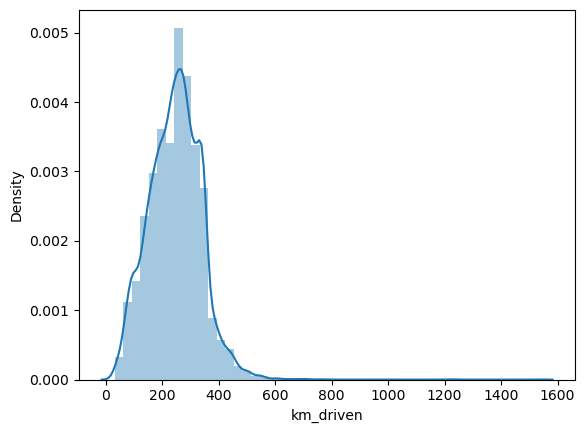

In [18]:
sns.distplot(np.sqrt(df["km_driven"]))

<Axes: >

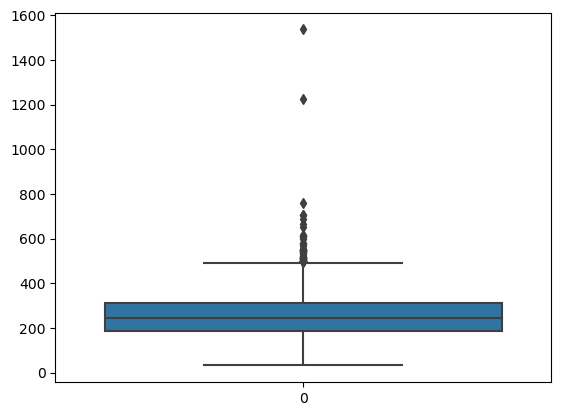

In [19]:
sns.boxplot(np.sqrt(df["km_driven"]))

In [20]:
np.sqrt(df["km_driven"]).skew()

0.6951951286778286

In [21]:
# after applying sqrt transformation outliers are gets reduced

In [22]:
np.log1p(df["km_driven"]).skew()

-1.0667350862285683

<Axes: xlabel='km_driven', ylabel='Density'>

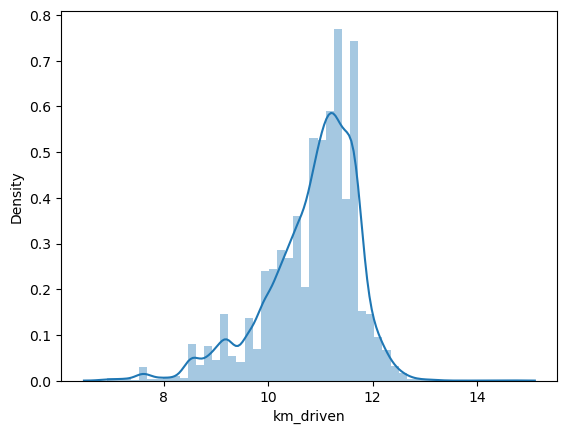

In [23]:
sns.distplot(np.log1p(df["km_driven"]))

<Axes: >

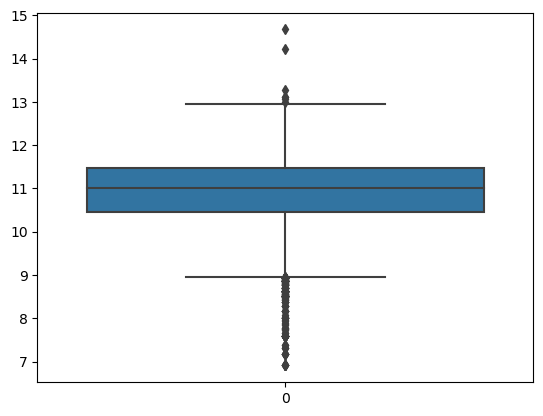

In [24]:
sns.boxplot(np.log1p(df["km_driven"]))

sqrt transformation can be good fit 

# selling price

In [25]:
outliers("selling_price").describe()

,year_of_purchase,km_driven,no_of_seats,selling_price
count,1246.000,1246.000,1246.000,1246.000
mean,2016.834,48266.829,5.697,1942046.521
std,2.100,42582.766,1.032,1414708.559
min,2006.000,1000.000,4.000,830000.000
25%,2016.000,20000.000,5.000,950000.000
50%,2017.000,40000.000,5.000,1272500.000
75%,2018.000,68089.000,7.000,2475000.000
max,2020.000,426000.000,9.000,10000000.000


In [26]:
# study only column that are responsible for selling price fluacuation(in our case all are there)
# check whether low and high prices are justificable
# not only use one column check also other column 

In [27]:
outliers("selling_price").head(50)

,company,year_of_purchase,km_driven,fuel_type,transmission_type,owner,no_of_seats,selling_price
0,Maruti,2017,35000,Diesel,Manual,First Owner,5.000,830000
1,Tata,2017,35000,Diesel,Manual,First Owner,5.000,830000
2,Maruti,2018,5000,Petrol,Automatic,First Owner,5.000,830000
3,Mahindra,2020,120000,Diesel,Manual,First Owner,7.000,830000
4,Toyota,2011,300000,Diesel,Manual,Third Owner,7.000,830000
5,BMW,2008,60000,Diesel,Automatic,Third Owner,5.000,830000
6,Tata,2017,35000,Diesel,Manual,First Owner,5.000,830000
7,Toyota,2013,215000,Diesel,Manual,First Owner,7.000,830000
8,Tata,2017,35000,Diesel,Manual,First Owner,5.000,830000
9,Maruti,2018,5000,Petrol,Automatic,First Owner,5.000,830000


analysis

In [28]:
# primary focus on year when year is less price is high and viceversa
# but sometime yesr used is more but price is high(then seee other columnn like brand)premium brands having high price even after high usage

<Axes: xlabel='selling_price', ylabel='Density'>

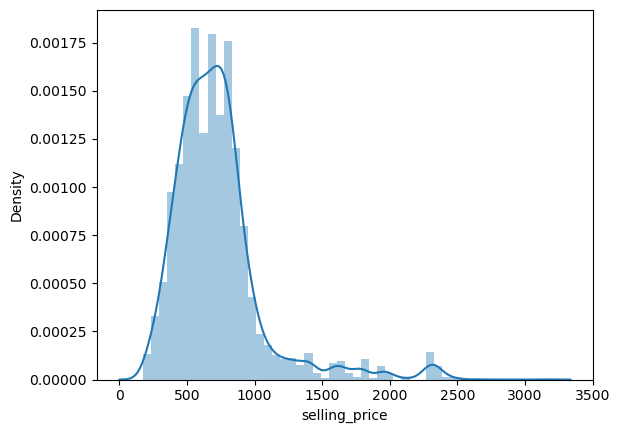

In [29]:
# not able to know why other outliers are coming just transformed it

sns.distplot(np.sqrt(df["selling_price"]))

<Axes: >

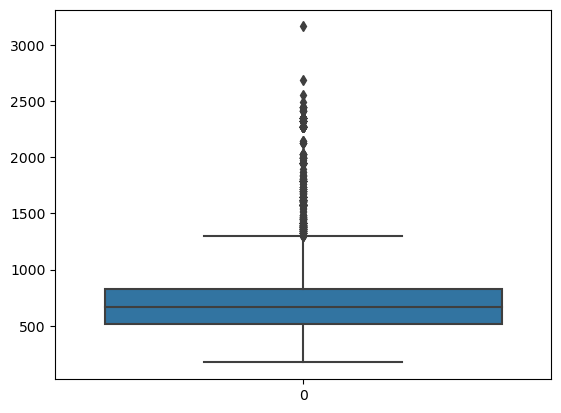

In [30]:
sns.boxplot(np.sqrt(df["selling_price"]))

<Axes: xlabel='selling_price', ylabel='Density'>

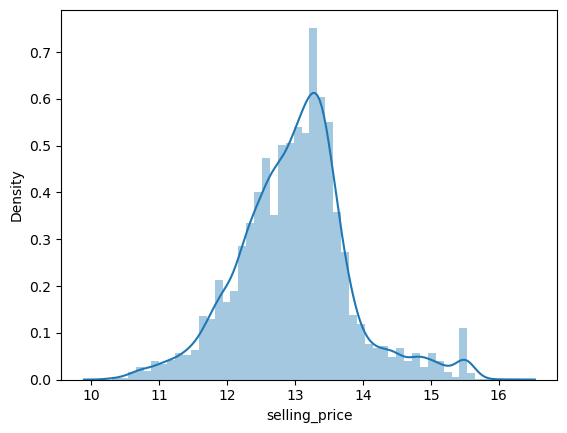

In [31]:
sns.distplot(np.log1p(df["selling_price"]))

<Axes: xlabel='selling_price', ylabel='Density'>

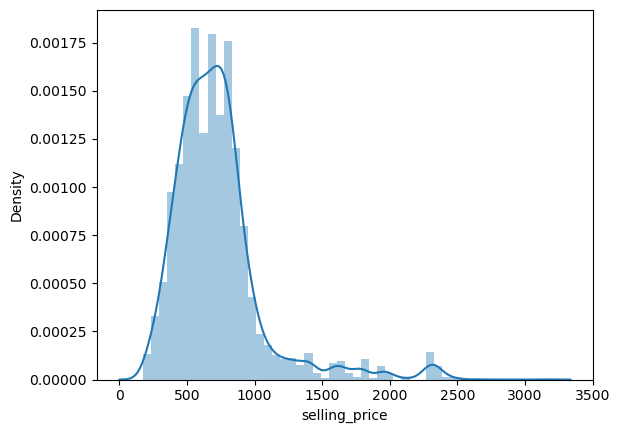

In [32]:
sns.distplot(np.sqrt(df["selling_price"]))

In [33]:
np.log1p(df["selling_price"]).skew()

0.2512492929902929

In [34]:
np.sqrt(df["selling_price"]).skew()

2.2417147896983516

log tranfomartion can be good slling price as it is making selling price more normal

<Axes: >

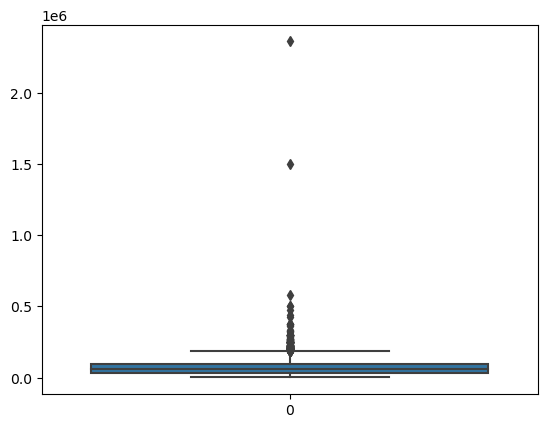

In [35]:
sns.boxplot(df["km_driven"])

<Axes: xlabel='km_driven', ylabel='Density'>

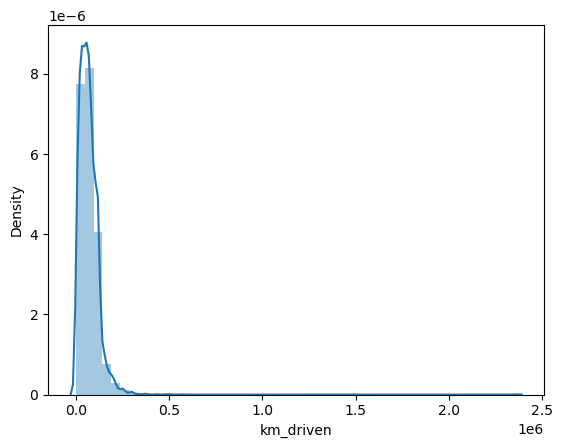

In [36]:
sns.distplot(df["km_driven"])

<Axes: xlabel='no_of_seats', ylabel='Density'>

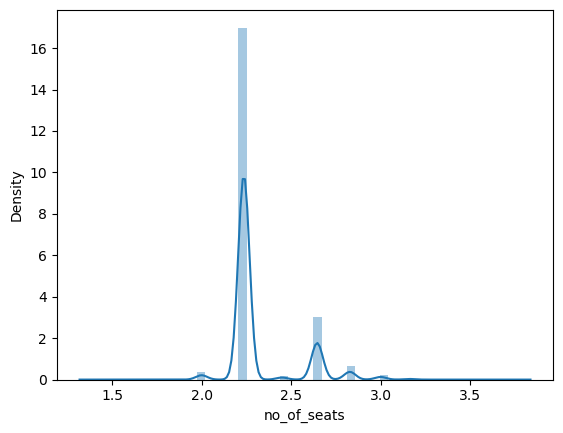

In [37]:
sns.distplot(np.sqrt(df["no_of_seats"]))

<Axes: xlabel='no_of_seats', ylabel='Density'>

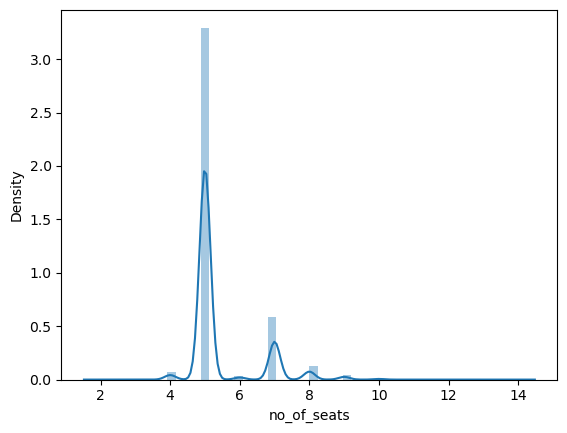

In [38]:
sns.distplot(df["no_of_seats"])

In [39]:
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer(method='box-cox')#method='box-cox'
X_transformed = transformer.fit_transform(np.array(df["no_of_seats"]).reshape(-1,1))

<Axes: ylabel='Density'>

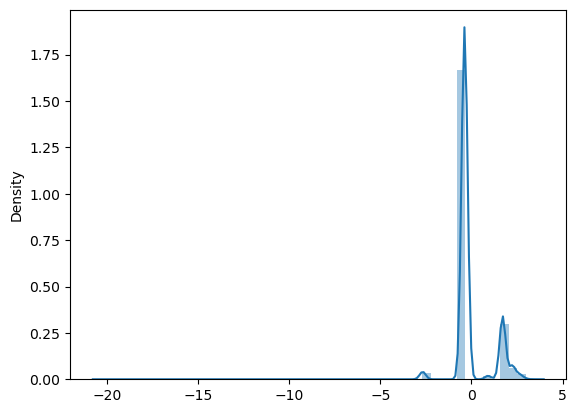

In [40]:
sns.distplot(X_transformed)

In [41]:
df.to_csv("missing_value_handled_data.csv")